In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [90]:
data = pd.read_csv("brunhild.txt", sep='\s+')
data.head()

,Hours,Sulfate
0,2,15.11
1,4,11.36
2,6,9.77
3,8,9.09
4,10,8.48


## (a) Regression line in log-log coordinate

In [91]:
logx = np.log(data['Hours'])
logy = np.log(data['Sulfate'])

X_train, X_test, y_train, y_test = train_test_split(logx, logy, test_size=0.2, random_state=23)

# build regression line in log-log coordinate
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1), y_train)
prediction = lr.predict(np.array(X_test).reshape(-1,1))

Text(0.5,1,'log-log plot')

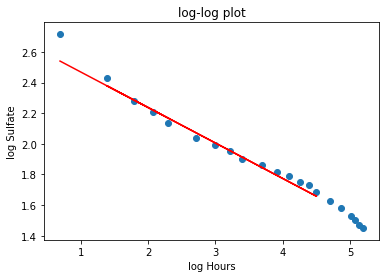

In [92]:
# scatter plot of the data and regression line
fig, ax = plt.subplots()
ax.scatter(logx,logy)
ax.plot(X_test, prediction, color='r')
ax.set_xlabel('log Hours')
ax.set_ylabel('log Sulfate')
ax.set_title('log-log plot')

Text(0,0.5,'Residual Plot')

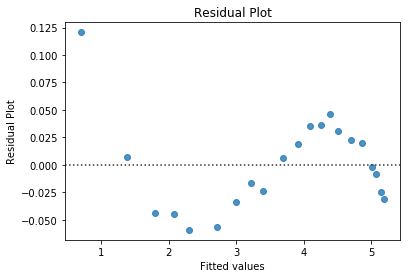

In [93]:
sns.residplot(logx, logy)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual Plot')

## (b) Regression curve in the original coordinate

In [95]:
x = data['Hours']
y = data['Sulfate']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# build regression line in original coordinate
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1), y_train)
prediction = lr.predict(np.array(X_test).reshape(-1,1))

Text(0.5,1,'original plot')

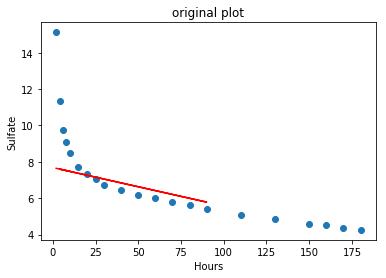

In [96]:
# scatter plot of the data and regression line
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(X_test, prediction, color='r')
ax.set_xlabel('Hours')
ax.set_ylabel('Sulfate')
ax.set_title('original plot')

Text(0,0.5,'Residuals')

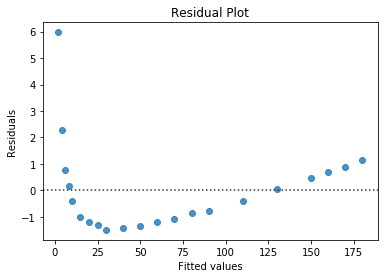

In [97]:
sns.residplot(x, y)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Conclusion: The regression is pretty good when fitted on the log of the concentration against the log of time, the residuals are normally distributed; However, it's bad when fitted on then original coordinate. This is because the distributaion of the data is polynomial so linear model can't fit the curve accurately. 